# Resume Classification: A Multi-Classification NLP Project

Natural Language Processing (NLP) has gained popularity for multiple reasons and it is an exciting technology that is here to stay for a long time. NLP deals with machines understanding the way humans speak and write the language in their everyday lives. If this Artificial Intelligence (AI) subdomain grabs your attention, you can start with some textbook projects. In this article, I am going to go over one of the simple projects of that kind: classifying an applicant's resume. 

The conventional techniques of hiring a candidate for a position is becoming more labor intensive, therefore inefficient, because of the growing online recruitment. The companies receive an excessive number of resumes in multiple categories for the vacant positions. Using some of the NLP and Machine Learning (ML) techniques, categorizing the applicants' resumes for the available positions can be automated. In this article, let's develop a simplified version of such a multiclass classification in Python using NLP. We will briefly go over the following steps:

1- Acquiring data

2- Cleaning/preprocessing/exploring text data

3- Vectorizing text data

4- Developing the ML algorithm

As a note, performance evaluation/comparison of the results will not be covered here since the main goal is to demonstrate basic NLP steps.
Assuming you already have a Python environment, let's begin with importing pandas and matplotlib.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Handling the data
The first step in an ML project is to acquire the data. In this case, the data is conveniently provided to you in the form of a csv file. (Here is the link to the dataset) 

Once we read the data (pd.read_csv()) into a dataframe df, we are sneaking into our dataframe using **head** and **tail** methods. This will give us some rough idea about what types of preprocessing our text data need when we are dealing with NLP.   

In [4]:
df = pd.read_csv('./data/UpdatedResumeDataset2.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


It is always nice to see more of the text early in the game. For that reason, let's set the maximum column width to 800(pd.set_option()). Notice that the amount of text that you can see is increased below. By peeking into the text, we already notice that there are non-alphanumeric characters, numbers, and backslashes that need to be cleaned in the text. 

There are two columns of data (df.columns), and they both are text fields: Category and Resume. To be able to process the data for our machine learning model, we need to convert both of these text columns into numbers. 

In [6]:
pd.set_option('max_colwidth', 800)

In [7]:
df.tail()

,Category,Resume
957,Testing,"Computer Skills: â¢ Proficient in MS office (Word, Basic Excel, Power point) Strength: â¢ Hard working, Loyalty & Creativity â¢ Self-motivated, Responsible & Initiative â¢ Good people management skill & positive attitude. â¢ knowledge of windows, Internet.Education Details \r\n Bachelor of Electrical Engineering Electrical Engineering Nashik, Maharashtra Guru Gobind Singh College of Engineering and Research Centre\r\n Diploma Electrical Engineering Nashik, Maharashtra S. M. E. S. Polytechnic College\r\nTesting Engineer \r\n\r\n\r\nSkill Details \r\nEXCEL- Experience - 6 months\r\nMS OFFICE- Experience - 6 months\r\nWORD- Experience - 6 monthsCompany Details \r\ncompany - \r\ndescription - Department: Testing\r\n\r\nResponsibilities: â¢ To check ACB and VCB of Circuit Breaker.\r\..."
958,Testing,"â Willingness to accept the challenges. â Positive thinking. â Good learner. â Team Player. DECLARATION: I hereby declare that the above mentioned information is correct up to my knowledge and I bear the responsibility for the correctness of the above mentioned particulars. Date: / / Name: Dongare Mandakini Murlidhar Signature: Education Details \r\nJune 2015 Electronics and Telecommunication Engineering Kolhapur, Maharashtra Shivaji University\r\nJune 2012 Education Secondary and Higher Secondary\r\n B.E. Electronics and Telecommunication Jaywant College of Engineering and Management\r\nTesting Engineer \r\n\r\nElectronics Engineer - Abacus Electronics Pvt Ltd\r\nSkill Details \r\nLanguage - C, C++- Experience - Less than 1 year months\r\nOperating Systems- Windows 7-8/NT/..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerness to learn new things, â¢ Competitive attitude, â¢ Good leadership qualities, â¢ Ability to deal with people diplomatically. PERSONAL DOSSIER Fathers Name: Dhanraj WaghEducation Details \r\nJanuary 2012 to January 2016 Bachelors of Engineering Engineering Pune, Maharashtra Pune University\r\nJanuary 2012 Higher Secondary Certificate Nashik, Maharashtra SND College of Engineering and Research Center\r\nJanuary 2010 Secondary School Certificate Yeola, Maharashtra Swami Muktanand Jr. College\r\n HSC Maharashtra State Board\r\n SSC Maharashtra State Bard\r\n BE Rajapur, Uttar Pradesh Madhyamik Vidya Mandir Rajapur\r\nTesting and Quality Control Engineer \r\n\r\nTesting and Quality Control Engineer - M/S Rakesh Transformer Industries ..."
960,Testing,"COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power Point, MS - Office, C, Protius (PCB Design), Multisim, Micro wind, Matlab, Keil, Latex, Basic I nternet Fundamentals, Software and Hardware Knowledge PROJECT DETAILS Diploma Project: Speed Control of DC Motor Using Heart Beats. Mini Project: Water Gardening System Using Solar Panel. Final Year BE Project: Iris Recognition system.Education Details \r\nJanuary 2016 BE EDUCATION Pune, Maharashtra PUNE University\r\nJanuary 2010 SSC Maharashtra Board\r\nQuality Engineer \r\n\r\nQuality Engineer - Matrix Technologies\r\nSkill Details \r\nMATLAB- Experience - 6 months\r\nPCB- Experience - 6 months\r\nPCB DESIGN- Experience - 6 monthsCompany Details \r\ncompany - Matrix Technologies\r\ndescription - \r\ncompany - RB Electronics\r\ndescription -"
961,Testing,"Skill Set OS Windows XP/7/8/8.1/10 Database MYSQL, sql server 2005, 2008 & 2012 Languages Core Java Web Technology HTML, CSS Testing Manual Testing, Database Testing Other Bug tracking and reporting, End user handling.Education Details \r\nJanuary 2016 MCS Pune, Maharashtra P.V.P College Pravaranagar\r\nJanuary 2011 HSC A.K.Junior College\r\nJanuary 2009 SSC A.K.Mahavidyalya\r\nJR TESTING ENGINEER \r\n\r\nJR TESTING ENGINEER - M-Tech Innovations Ltd\r\nSkill Details \r\nTESTING- Experience - 24 months\r\nWINDOWS XP- Experience - 24 months\r\nCSS- Experience - 6 months\r\nDATABASE- Experience - 6 months\r\nDATABASE TESTING- Experience - 6 monthsCompany Details \r\ncompany - M-Tech Innovations Ltd\r\ndescription - Responsibi

In [8]:
df.columns

Index(['Category', 'Resume'], dtype='object')

Let's see how many different classes of resumes we have in our dataset using the value_counts() method of pandas library. 

In [9]:
len(df.Category.value_counts())

25

Out of 25 different categories, Java Developer class is the largest class with 84 resumes, whereas Advocates class is the smallest with only 20 resumes. We have 40 resumes in Data Science class. Our goal is to develop a machine learning classifier which is going to correctly predict the class of an applicant's resume. Since we have 25 different categories, we will develop a multi-class classification algorithm. 

In [10]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

To get information about non-null values and memory usage, we can rely on the info() method of pandas. We do not have any null values. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


It is always a good idea to visualize your findings. We will use seaborn countplot to sea each category. 

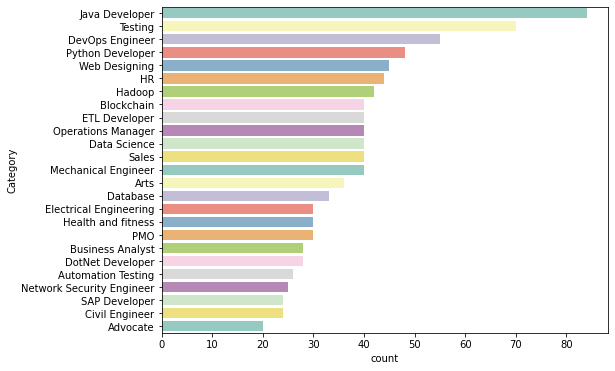

In [12]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index);

### Text Cleaning
We need to apply some data cleaning before vectorizing our text data. Just a quick reminder, in NLP, we need to convert text data to numbers before applying any machine learning. That process is called the vectorization of the text data. 

Let's have a quick look at one of the resumes to better understand what types of steps we need to perform. 

In [13]:
df["Resume"][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Experience - Less than 1 year months\r\nStatsmodels- Experience - 12 months\r\nAWS- Experience - Less than 1 year months\r\nMachine learning- Experience - Less than 1 year months\r\nSklearn- Experience - Less than 1 year months\r\nScipy- Experience - Less than 1 year months\r\nKeras- Experience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146 

After carefully looking at the text data, we notice a lot of punctuation, numbers, non-ascii characters, and extra white spaces that need to be removed. For a list of punctuation marks, you can import them from string class, and use this list of characters in your cleaning function. 

In [14]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


During text cleaning, we mainly find and replace patterns in the text. This process is easily handled by regular expressions.  Simply put, a regular expression is defined as an ”instruction” that is given to a function on what and how to match, search or replace a set of strings.

As a side note, regular expressions should be understood really well if you want to be good in NLP since they are used in various tasks such as:

- Data pre-processing,
- Rule-based information Mining systems,
- Pattern Matching,
- Text feature Engineering,
- Web scraping,
- Data Extraction, etc.  

There is a third party module in Python called re that handles regular expressions. In our cleanResume function, we are going to use mostly re.sub method to substitute a text with another, and re.escape to skip the punction marks so that we can eventually eliminate them from our text.We remove the punctuations, non-ascii characters, extra whitespaces and numbers in cleanResume function as a basic text cleaning for now. For normalization purposes, we are converting all letters to lowercase as well. 

In [15]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'[0-9]+', '', resumeText)  #remove numbers
    return resumeText.lower()
    

Now, we can clean the text. All we need to do is to define a lambda function, apply the cleanResume function to each resume, and save the cleaned text in a new column "Cleaned Resume".

In [16]:
df["Cleaned Resume"] = df["Resume"].apply(lambda x: cleanResume(x))
len(df["Cleaned Resume"][1])

1111

In [17]:
df.head(1)

,Category,Resume,Cleaned Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript experience months jquery experience months python experienc...


### Word Clouds
To explore the text data visually, let's create a word cloud for the data science category. This will help us see the most frequently used words. Word cloud is a simple yet powerful visual representation tool in text processing. It shows the most frequent words with bigger and bolder fonts. The smaller the letters are, the less important the words are. The larger and the bolder the fonts of a word, the more frequent that word in the data science category.  

Before applying the word cloud, it is always a good idea to remove the stop words. Stop words are the frequently used words in a language regardless of the context. Since they are frequently used, they carry little information. To better optimize your algorithm, you can create a list of your own stop words. For now, we are going to use NLTK stop words which includes 179 words in English. 

If it is your first time using NLTK, and if you get the error "NLTK stop words not found", make sure to download the stop words after importing nltk by including the comment line below in your code. 

In [18]:
import nltk
#nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

len(stopwords.words('english'))

179

Since we are interested in the data science category only, we are saving the data science resumes in a separate data frame, ds_df. The for loop basically tokenizes each resume using teh word_tokenize() method of the nltk, and removes the stop words/punctuations from the text. 

In [21]:
ds_df = df[df.Category == 'Data Science']
resumes=""
total_words = []
for resume in ds_df["Cleaned Resume"]:
    resumes += resume
    words = word_tokenize(resume)
    for word in words :
        if word not in set(stopwords.words('english')) and word not in string.punctuation:
            total_words.append(word)

To visualize the words in a word cloud, all we need to do is to use WordCloud package with the generate method on the resumes. 

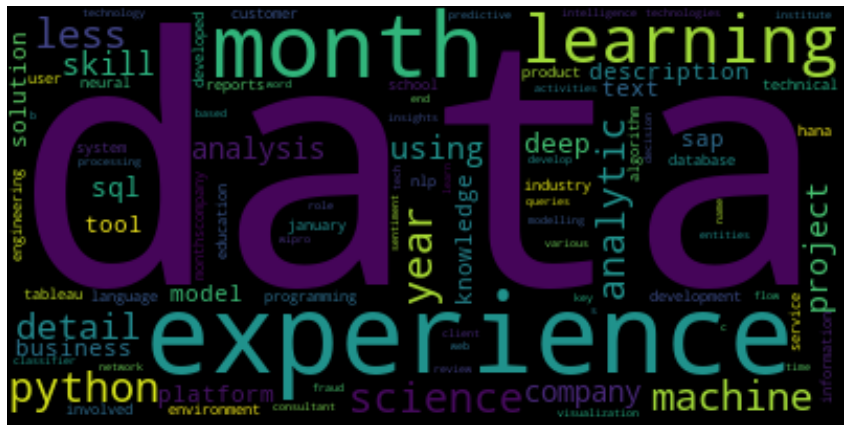

In [23]:
from wordcloud import WordCloud
wordcloudimage = WordCloud( font_step=2 ,
                            max_font_size=500,
                            collocations = False,
                            #collocation_threshold = 1 
                          ).generate(resumes)

plt.figure(figsize=(15,15))
plt.imshow(wordcloudimage, interpolation='bilinear')
plt.axis("off")
plt.show()

In addition to word cloud, you can also see the frequency distribution of each word in the text, that is the number of times a word is used in total_words. FreqDist function is accessible from nltk library, and the total_words is fed into the function as an argument. The most frequent word is 'data' with a word frequency of 396. During the data analysis phase, it is obvious that some of the words such as 'months', 'experience', 'year', and 'less' are not specific to the category. They are most probably the frequent words in other categories as well as data science. For that reason, you might want to consider removing them from your future set before the classification.  

In [ ]:
freq_word = nltk.FreqDist(total_words)
freq_word.most_common(10)

### Converting label field to numbers
Our label field, categories, is text and it needs to be converted to numbers as well. One way to do that is to import LabelEncoder from sklearn.preprocesing library. After fitting and transforming the category column, we have integer label fields. 
Now, all we need to do is to vectorize our text, which means to convert the text into numbers as well. 

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Labels']=encoder.fit_transform(df.Category)


To check if we successfully convert our labels into integers, let's run info() method of the pandas one more time. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   Cleaned Resume  962 non-null    object
 3   Labels          962 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 30.2+ KB


In [27]:
df.Labels.value_counts()[:5]

15    84
23    70
8     55
20    48
24    45
Name: Labels, dtype: int64

df.sample() will help us to have a look at two random resumes, and the labels.  

In [29]:
df.sample(2)

,Category,Resume,Cleaned Resume,Labels
483,Electrical Engineering,"â¢ Achievement oriented with people management skills and an ability to manage change with ease. â¢ Proven strength in problem solving, coordination and analysis. â¢ Strong communication, interpersonal, learning and organizing skills matched with the ability to manage stress, time and people effectively. â¢ Able to handle multiple task & projects simultaneously. â¢ Willing to travel & relocate.Education Details \r\n B.E Electrical and Electronics Engineering Gulbarga, Karnataka VTU (Vishweshwariya University)\r\n HSC Wai, Maharashtra Kisanveer Mahavidyalay WAI\r\n Kohlapur University\r\nElectrical Engineer \r\n\r\nElectrical Engineer - REFCON ENGINEERING PVT. LTD\r\nSkill Details \r\nCompany Details \r\ncompany - REFCON ENGINEERING PVT. LTD\r\ndescription - GREENFIELD PROJECT:...",achievement oriented with people management skills and an ability to manage change with ease proven strength in problem solving coordination and analysis strong communication interpersonal learning and organizing skills matched with the ability to manage stress time and people effectively able to handle multiple task projects simultaneously willing to travel relocate education details b e electrical and electronics engineering gulbarga karnataka vtu vishweshwariya university hsc wai maharashtra kisanveer mahavidyalay wai kohlapur university electrical engineer electrical engineer refcon engineering pvt ltd skill details company details company refcon engineering pvt ltd description greenfield project project status libs braseries burkena faso africa completed citrus processing india...,11
351,Java Developer,"Education Details \r\nJanuary 2013 Master of Engineering Information Technology Pune, Maharashtra M.I.T\r\nJanuary 2005 Bachelor of Engineering Information Technology Pusad, Maharashtra Amravati University\r\nJanuary 2001 Pusad, Maharashtra P. N. Junior College\r\nJanuary 1999 S.S.C Pusad, Maharashtra K.D. High-School\r\nJava Developer \r\n\r\nJava Developer - Maxgen Technologies\r\nSkill Details \r\nCompany Details \r\ncompany - Maxgen Technologies\r\ndescription - Currently working in Infrasoft Technologies, Andheri as a Java Developer.\r\ncompany - MIS Generation of Tata Sky and Tata Power\r\ndescription - COURSES DONE: Android -Mobile App Development, Technologies in Java-Core Java,\r\nAdvance Java, JSF, Hibernate, Spring at NIIT in 2015-16.\r\n\r\nANDROID PROJECT: Location Dete...",education details january master of engineering information technology pune maharashtra m i t january bachelor of engineering information technology pusad maharashtra amravati university january pusad maharashtra p n junior college january s s c pusad maharashtra k d high school java developer java developer maxgen technologies skill details company details company maxgen technologies description currently working in infrasoft technologies andheri as a java developer company mis generation of tata sky and tata power description courses done android mobile app development technologies in java core java advance java jsf hibernate spring at niit in android project location detector of computing and mobile devices android me project data deduplication my projects works to reduce redu...,15


Now, the next thing is to split the data into train and test sets before we vectorize using the train_test_split() of sklearn.model_selection. We keep the ratio as 0.75 vs 0.25.
Since our dataset is not balanced, we will stratify the datasets. 

In [30]:
from sklearn.model_selection import train_test_split

text = df["Cleaned Resume"].values
labels = df["Labels"].values

text_train,text_test,y_train,y_test = train_test_split(text, labels, random_state=0, test_size=0.25, stratify=df.Labels)
print(text_train.shape)
print(y_train.shape)
print(text_test.shape)
print(y_test.shape)

(721,)
(721,)
(241,)
(241,)


### Vectorization

The simplest form of text vectorization is the Bag of Words (BoW) model. Sklearn library makes the BoW application very easy with CountVectorizer, TfidfVectorizer, and TfidfTransformer. Let's use the TfidfVectorizer with the default tokenizer, and by removing the English stopwords.  

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    use_idf = True,
    stop_words='english',
    max_features=1000)

As a rule of thumb, after we instantiate it, we fit the vectorizer ONLY with the train dataset to create the vocabulary. After fitting the train data, a dictionary of words and matching indices is created and saved in the vocabulary_. We transform the vectorizer both with the train and test set to produce the whole vector with tfidf values. 

Since we limited the max_features, the size of the vector is 1000 features, or words, and 769 rows, or documents. 

In [33]:
X_train = word_vectorizer.fit_transform(text_train)
X_train.shape

(721, 1000)

In [34]:
X_test = word_vectorizer.transform(text_test)
X_test.shape

(241, 1000)

In [35]:
import itertools
dict(itertools.islice(word_vectorizer.vocabulary_.items(), 10))

{'working': 991,
 'quick': 722,
 'details': 238,
 'june': 470,
 'law': 478,
 'mumbai': 576,
 'maharashtra': 510,
 'university': 952,
 'january': 455,
 'com': 139}

### Multi-class Classification

Now, we have the vectorized train and test datasets. All we need to do is to use a multiclass classifier on our dataset. 

One of such algorithms is One-vs-Rest. Let's use One-vs-Rest with different binary classifiers such as KneighborsClassifier, and MultinomialNB.

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction_mnb = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.97


In [37]:
from sklearn.neighbors import KNeighborsClassifier

model = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train, y_train)
prediction_knc = model.predict(X_test)

model.fit(X_train,y_train)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.97


The initial results from both classifiers look promising in terms of accuracy. However, this dataset is not balanced since each class is not represented equally well  

There are definitely some areas of improvement in that implementation. For instance, our dataset is imbalanced and we did not do anything for handling the imbalanced dataset so far. We can also try hypertuning using gridSearchCV in each classifier. 

Lastly, let's check the classification report for the MultinomialNB and see the precision, recall, and f1-score for each class. 

In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_mnb))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      0.57      0.73         7
          10       1.00      1.00      1.00        10
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         8
          15       0.81      1.00      0.89        21
          16       1.00      1.00      1.00        10
          17       1.00    

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_knc))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.56      0.71         9
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        10
          17       1.00    

In [40]:
l1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
list(zip(encoder.classes_,l1))

[('Advocate', 0),
 ('Arts', 1),
 ('Automation Testing', 2),
 ('Blockchain', 3),
 ('Business Analyst', 4),
 ('Civil Engineer', 5),
 ('Data Science', 6),
 ('Database', 7),
 ('DevOps Engineer', 8),
 ('DotNet Developer', 9),
 ('ETL Developer', 10),
 ('Electrical Engineering', 11),
 ('HR', 12),
 ('Hadoop', 13),
 ('Health and fitness', 14),
 ('Java Developer', 15),
 ('Mechanical Engineer', 16),
 ('Network Security Engineer', 17),
 ('Operations Manager', 18),
 ('PMO', 19),
 ('Python Developer', 20),
 ('SAP Developer', 21),
 ('Sales', 22),
 ('Testing', 23),
 ('Web Designing', 24)]